<a href="https://colab.research.google.com/github/aslla77/aslla77/blob/master/Loop_strategy/prison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [12]:
class prison:
  def __init__(self,N,Max_Step):
    self.N=N
    self.Max_Step=Max_Step

  def create_setting(self):
    self.box=[i for i in range(1,self.N+1)]
    self.target=random.sample([i for i in range(1,self.N+1)], self.N)
    self.box_data=dict(list(zip(self.box , self.target )))

  def random_select(self):
    c_person_data=dict(list(zip([i for i in range(self.N+1)],[0 for i in range(self.N+1)])))
    c_p_percent_data=dict(list(zip([i for i in range(self.N+1)],[0 for i in range(self.N+1)])))
    for __ in range(self.Max_Step):
      self.create_setting()
      correct_person=0
      for i in range(1,self.N+1):
        checklist=[]
        checknum=1
        while not(checknum==self.N//2):
          checkbox=np.random.randint(1,self.N+1)
          if checkbox in checklist:
            pass
          elif self.box_data[checkbox]== i:
            correct_person+=1
            break
          else:
            checklist.append(checkbox)
            checknum+=1
      c_person_data[correct_person]+=1

      c_p_percent_data[correct_person]+=1/self.Max_Step

    self.check_data(c_person_data,c_p_percent_data)
    return c_p_percent_data


  def strategy(self):
    c_person_data=dict(list(zip([i for i in range(self.N+1)],[0 for i in range(self.N+1)])))
    c_p_percent_data=dict(list(zip([i for i in range(self.N+1)],[0 for i in range(self.N+1)])))
    for __ in range(self.Max_Step):
      self.create_setting()
      correct_person=0
      for i in range(1,self.N+1):
        checknum=1
        checkbox=i
        while not(checknum==self.N//2):
          if self.box_data[checkbox]== i:
            correct_person+=1
            break
          else:
            checknum+=1
            checkbox=self.box_data[checkbox]

        c_person_data[correct_person]+=1

      c_p_percent_data[correct_person]+=1/self.Max_Step
    self.check_data(c_person_data,c_p_percent_data)
    return c_p_percent_data

  def check_data(self,c_person_data,c_p_percent_data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.bar(c_person_data.keys(),c_person_data.values())
    plt.title('total number of corrext person')
    plt.xlabel('number of correct person')
    plt.ylabel('correct person Distribution(%)')
    
    plt.subplot(1,2,2)
    plt.bar(c_p_percent_data.keys(),c_p_percent_data.values())
    plt.title('percent')
    plt.xlabel('number of correct person')
    plt.ylabel('probablity')
    plt.show()
  

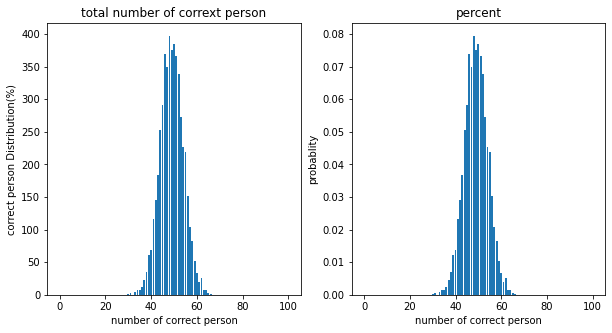

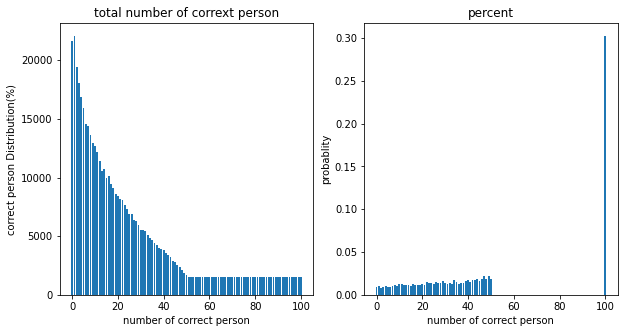

In [13]:
N=100                       # 실험의 참여 인원 수
max_step= 5000             # 실험의 반복 횟수
run=prison(N,max_step)      # 실험 설정
result_random=run.random_select()         # 싦험 시작(전략 없이 무작위로 추출하였을 경우)
result_strategy=run.strategy()              # 실험 시작(전략을 설정 할 경우)

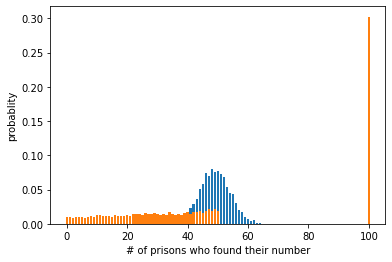

전략 사용시 모두 찾을 확률: 30.24 %
전략 사용시 실패 확률: 69.76 %


In [14]:
plt.bar(result_random.keys(),result_random.values())      
plt.bar(result_strategy.keys(),result_strategy.values())     
plt.ylabel('probablity')
plt.xlabel('# of prisons who found their number')
plt.show() 
print('전략 사용시 모두 찾을 확률:',round(result_strategy[100]*100,4),'%')
print('전략 사용시 실패 확률:',round((1-result_strategy[100])*100,4),'%')